In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [72]:
data = pd.read_csv('./data/adult.csv')
df = data.copy()

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [74]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [75]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

unknown_val = '?'
count_per_column = df.apply(lambda col: col.value_counts().get(unknown_val, 0))
count_per_column


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education.num'}>,
        <Axes: title={'center': 'capital.gain'}>],
       [<Axes: title={'center': 'capital.loss'}>,
        <Axes: title={'center': 'hours.per.week'}>]], dtype=object)

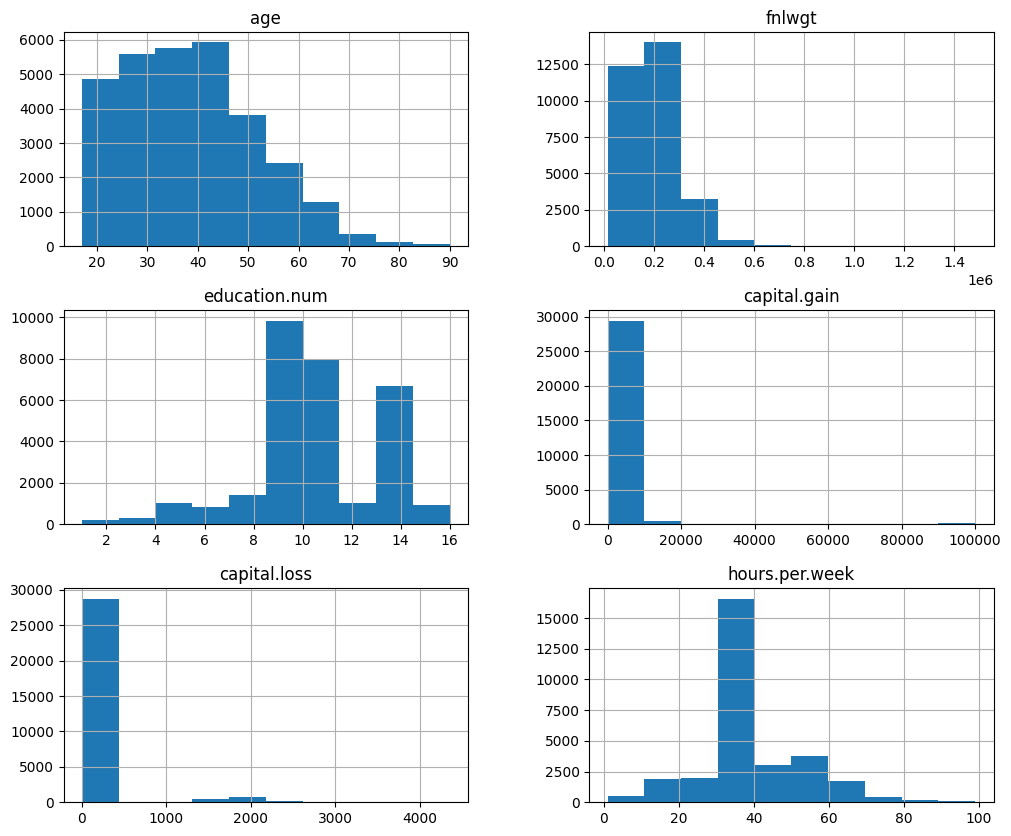

In [76]:
df.hist(figsize=[12, 10])

<Axes: >

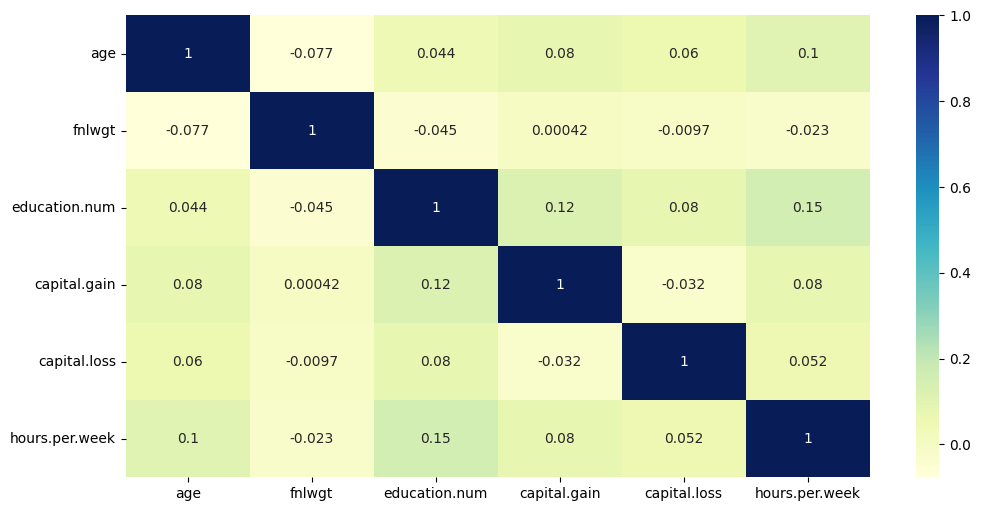

In [77]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=[12, 6])
sns.heatmap(numeric_df.corr(), annot = True, cmap='YlGnBu')

In [78]:
numeric_cols = numeric_df.columns
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,0.890411,Private,0.080970,HS-grad,0.533333,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,1.000000,0.173469,United-States,<=50K
3,0.506849,Private,0.086061,7th-8th,0.200000,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.895317,0.397959,United-States,<=50K
4,0.328767,Private,0.170568,Some-college,0.600000,Separated,Prof-specialty,Own-child,White,Female,0.0,0.895317,0.397959,United-States,<=50K
5,0.232877,Private,0.138072,HS-grad,0.533333,Divorced,Other-service,Unmarried,White,Female,0.0,0.865473,0.448980,United-States,<=50K
6,0.287671,Private,0.093024,10th,0.333333,Separated,Adm-clerical,Unmarried,White,Male,0.0,0.865473,0.397959,United-States,<=50K


In [79]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'], dtype=int)

In [80]:
df['income'] = df['income'].apply(lambda inc : 1 if inc == ">50K" else 0)
df['income'].value_counts()

income
0    22654
1     7508
Name: count, dtype: int64

In [81]:
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [100]:
weis = np.zeros(X_train.shape[1])
bias = 0
alpha = 0.02

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

loss = np.zeros(1000)
m = X_train.shape[0]

for i in range(1000):  # number of epochs
    linear_model = np.dot(X_train, weis) + bias
    y_predicted = sigmoid(linear_model)

    loss[i] = -np.mean(y_train * np.log(y_predicted) + (1 - y_train) * np.log(1 - y_predicted))
    
    dw = (1 / m) * np.dot(X_train.T, (y_predicted - y_train))
    db = (1 / m) * np.sum(y_predicted - y_train)
    
    weis -= 0.01 * dw  # 0.01 is the learning rate
    bias -= 0.01 * db


In [108]:
y_pred = sigmoid(np.dot(X_test, weis) + bias)  >= 0.5
y_pred

array([False, False, False, ..., False,  True, False])

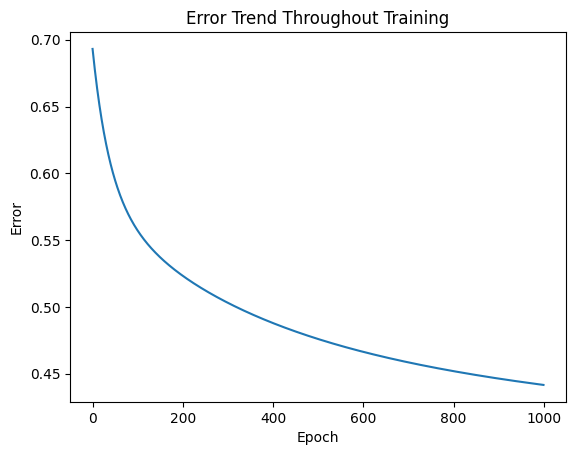

In [109]:
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Trend Throughout Training')
plt.show()

In [110]:
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7745731808387204
